In [1]:
from neuralcomputer import *

In [2]:
# Generate the computer with the given parameters
n_insts = 8
n_vars = 8
machine = init_computer(n_insts, n_vars)

In [3]:
# Save the computer and print numbers
GG = machine.G.copy()
GGs = machine.Gs.copy()
print('# of Neurons:', len(list(GG.nodes())))
print('# of Instructions:', len(list(GGs.nodes())))
nx.write_graphml(GG, 'machine_G.graphml')
nx.write_graphml(GGs, 'machine_Gs.graphml')

1780
532


In [23]:
T = 15000 # Set simulation time steps

nx.write_gexf(machine.G, 'machine_G.gexf')
A = nx.adjacency_matrix(machine.G)
A = A.todense()
nodes = list(machine.G.nodes())
print(len(nodes))
x = np.zeros((1,A.shape[0]))
spike = x * 0.

nodes = list(machine.G.nodes())

def add_instr(x,line,var):
    x[0,nodes.index('V_'+str(100+10*line))] = -1.-2.*var
    return x
def dec_instr(x,line,var):
    x[0,nodes.index('V_'+str(100+10*line))] = -2.-2.*var
    return x
def jnz_instr(x,line,linetojump,var):
    x[0,nodes.index('V_'+str(100+10*line))] = 0.
    x[0,nodes.index('V_'+str(3000+1*line))] = -1-linetojump
    x[0,nodes.index('V_'+str(4000+1*line))] = -2-var
    return x
def set_var(x,var,val):
    x[0,nodes.index('V_'+str(2000+var))] = val*-1.
    return x

sample_program = 3
if sample_program == 0:
    x[0,nodes.index('V_100')] = -1.
    x[0,nodes.index('V_110')] = -2.
    x[0,nodes.index('V_120')] = -1.
    x[0,nodes.index('V_130')] = -0.
    x[0,nodes.index('V_3003')] = -6.
if sample_program == 1:
    x = np.zeros((1,A.shape[0]))
    x[0,nodes.index('V_2000')] = -10. # variable
    x[0,nodes.index('V_100')] = -2.
    x[0,nodes.index('V_110')] = -0.
    x[0,nodes.index('V_3001')] = -1. # jump address (line)
    x[0,nodes.index('V_120')] = -1.
    x[0,nodes.index('V_130')] = -1.
if sample_program == 2:
    x = np.zeros((1,A.shape[0]))
    x[0,nodes.index('V_2000')] = -10. # variable
    x[0,nodes.index('V_100')] = -2.
    x[0,nodes.index('V_110')] = -3.
    x[0,nodes.index('V_120')] = -0.
    x[0,nodes.index('V_3002')] = -1. # jump address (line)
    x[0,nodes.index('V_4002')] = -2. # jump address (variable)
    x[0,nodes.index('V_130')] = -1.
    x[0,nodes.index('V_140')] = -4.
    x[0,nodes.index('V_150')] = 0.
    x[0,nodes.index('V_3005')] = -4. # jump address (line)
    x[0,nodes.index('V_4005')] = -3. # jump address (variable)
    x[0,nodes.index('V_160')] = -0.
    x[0,nodes.index('V_3006')] = -1. # jump address (line)
    x[0,nodes.index('V_4006')] = -2. # jump address (variable)
if sample_program == 3: # uses the simplified API
    x = np.zeros((1,A.shape[0]))
    x = set_var(x,0,10)
    x = dec_instr(x,0,0)
    x = add_instr(x,1,1)
    x = jnz_instr(x,2,0,0)
    x = add_instr(x,3,0)
    x = dec_instr(x,4,1)
    x = jnz_instr(x,5,3,1)
    x = jnz_instr(x,6,0,0)
    

x[0,nodes.index('N_10000')] = 1. # Start machine

def set_jump(x, N, instr):
    x[0,nodes.index('V_130')] = -2.*n_vars-1.
    x[0,nodes.index('V_2003')] = -2.
    x[0,nodes.index('V_3003')] = -2.
    return x

spike = x * 0.

x_history = []
s_history = []

show_spikes=0
for t in range(T):
    x_history.append(x.copy())
    s_history.append(spike.copy())
    x = x + spike.dot(A)
    spike = 1. * (x>0.)
    if show_spikes:
        for i in range(spike.shape[1]):
            if spike[0,i] == 1.:
                if nodes[i] == 'V_160':
                    print(nodes[i])
                pass
    x = x - np.multiply(spike, x)

1780


In [24]:
X = np.vstack(x_history)

Text(0, 0.5, 'Variable')

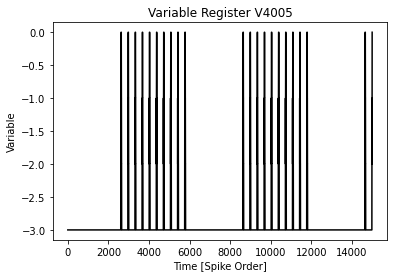

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt
plt.plot(X[:,nodes.index('V_4005')], '-k')
plt.title('Variable Register V4005')
plt.xlabel('Time [Spike Order]')
plt.ylabel('Variable')

Text(0, 0.5, 'Variable')

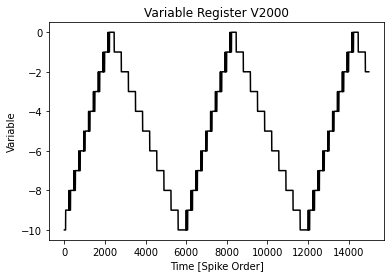

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt
plt.plot(X[:,nodes.index('V_2000')], '-k')
plt.title('Variable Register V2000')
plt.xlabel('Time [Spike Order]')
plt.ylabel('Variable')

Text(0, 0.5, 'Variable')

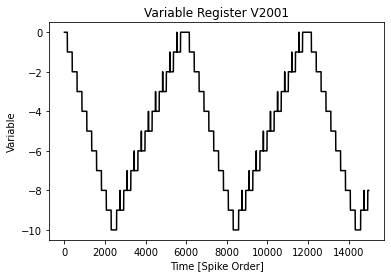

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
plt
plt.plot(X[:,nodes.index('V_2001')], '-k')
plt.title('Variable Register V2001')
plt.xlabel('Time [Spike Order]')
plt.ylabel('Variable')

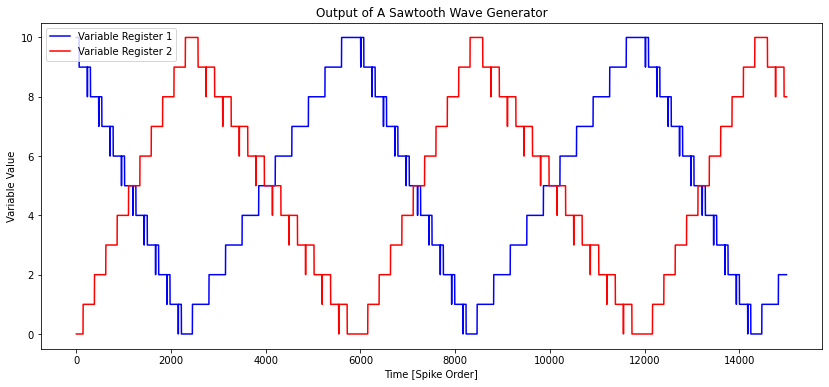

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
# plt.figure(figsize=(10,8))
plt.figure(figsize=(14,6))
plt.plot(-1.*X[:,nodes.index('V_2000')], '-b')
plt.plot(-1.*X[:,nodes.index('V_2001')], '-r')
plt.title('Output of A Sawtooth Wave Generator')
plt.xlabel('Time [Spike Order]')
plt.ylabel('Variable Value')
plt.legend(['Variable Register 1', 'Variable Register 2'])

Text(0.5, 1.0, 'Spikes in the Spiking Neural Computer')

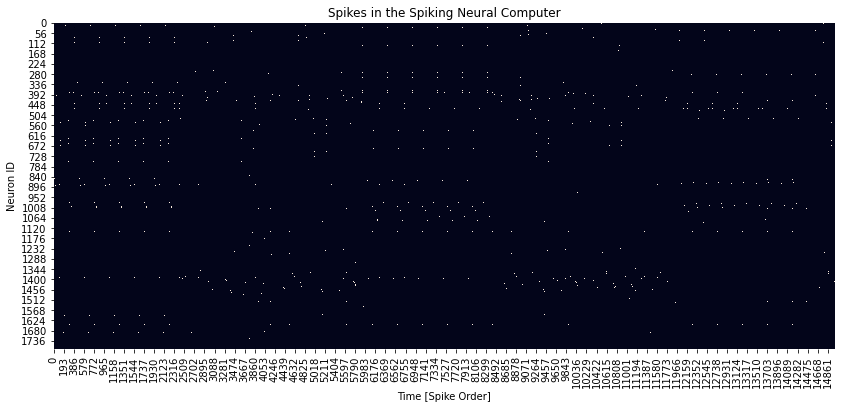

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
X = np.vstack(s_history).T
plt.figure(figsize=(14,6))
sns.heatmap(X, cbar=False)
plt.xlabel('Time [Spike Order]')
plt.ylabel('Neuron ID')
plt.title('Spikes in the Spiking Neural Computer')